## Top 3 Key Points

Heuristics provide practical approaches to complex optimization problems

Simulations imitate real-world systems to study behaviors

MLOps experiments also iterate to find optimal models

## Reflection Questions

---

### **1. When might a greedy algorithm succeed or fail to find the global optimum?**

* **Succeed**: When the problem has the *greedy-choice property* (local best = global best), e.g. interval scheduling, Huffman coding.
* **Fail**: When local decisions don’t add up to the global optimum, e.g. traveling salesman, knapsack (without special constraints).

---

### **2. How could you create a simulation to study a business or scientific process?**

* Define the system (inputs, rules, outputs).
* Build a model (e.g., with Python or simulation tools).
* Run experiments with different parameters.
* Analyze results to understand behavior and outcomes.

---

### **3. What simulations could provide insights to improve an ML model?**

* **Data simulations** → synthetic data generation to test edge cases.
* **Model simulations** → stress-test with noisy or missing data.
* **Deployment simulations** → simulate traffic spikes, latency, or drift.

---

### **4. How is MLOps experiment tracking similar to performing simulations?**

Both involve:

* Running many trials with different parameters.
* Recording results, metrics, and configurations.
* Comparing runs to decide what works best.

---

### **5. What challenges do you foresee trying to optimize simulations or experiments?**

* **Computational cost** (too many runs = expensive).
* **Complexity** (hard to model real-world processes fully).
* **Uncertainty** (simulations rely on assumptions that may be wrong).
* **Scalability** (hard to optimize when parameter space is huge).

---




In [1]:
# Greedy Job Scheduling
jobs = [("A", 2, 100), ("B", 1, 19), ("C", 2, 27), ("D", 1, 25), ("E", 3, 15)]
# (JobID, Deadline, Profit)

jobs.sort(key=lambda x: x[2], reverse=True)  # sort by profit

slots = [False] * max(job[1] for job in jobs)
schedule = [None] * len(slots)

for job in jobs:
    for d in range(job[1]-1, -1, -1):
        if not slots[d]:
            slots[d] = True
            schedule[d] = job[0]
            break

print("Greedy Schedule:", schedule)


Greedy Schedule: ['C', 'A', 'E']


In [8]:
import random

def simulate_greedy(runs=5):
    for i in range(runs):
        jobs = [(f"J{j}", random.randint(1, 3), random.randint(10, 100)) for j in range(5)]
        print(f"\nRun {i+1}, Jobs:", jobs)
        # apply greedy scheduling here (reuse previous code)
        # Greedy Job Scheduling

        jobs.sort(key=lambda x: x[2], reverse=True)  # sort by profit

        slots = [False] * max(job[1] for job in jobs)
        schedule = [None] * len(slots)

        for job in jobs:
            for d in range(job[1]-1, -1, -1):
                if not slots[d]:
                    slots[d] = True
                    schedule[d] = job[0]
                    break

        print("Greedy Schedule:", schedule)

simulate_greedy(3)





Run 1, Jobs: [('J0', 3, 59), ('J1', 2, 59), ('J2', 3, 64), ('J3', 3, 60), ('J4', 1, 75)]
Greedy Schedule: ['J4', 'J3', 'J2']

Run 2, Jobs: [('J0', 1, 87), ('J1', 3, 69), ('J2', 3, 68), ('J3', 2, 96), ('J4', 2, 36)]
Greedy Schedule: ['J0', 'J3', 'J1']

Run 3, Jobs: [('J0', 1, 47), ('J1', 1, 75), ('J2', 2, 58), ('J3', 1, 39), ('J4', 3, 51)]
Greedy Schedule: ['J1', 'J2', 'J4']


In [12]:
!pip install pandas
!pip install mlflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 28.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.9/705.9 kB 23.3 MB/s eta 0:00:00


In [5]:
import mlflow
jobs = [("A", 2, 100), ("B", 1, 19), ("C", 2, 27), ("D", 1, 25), ("E", 3, 15)]
total_profit = sum([job[2] for job in jobs if job])

with mlflow.start_run():
    mlflow.log_param("algorithm", "Greedy")
    mlflow.log_metric("total_profit", total_profit)


 The best solution found:                                                                           
 [1. 1. 1. 1. 1.]

 Objective function:
 -186.0


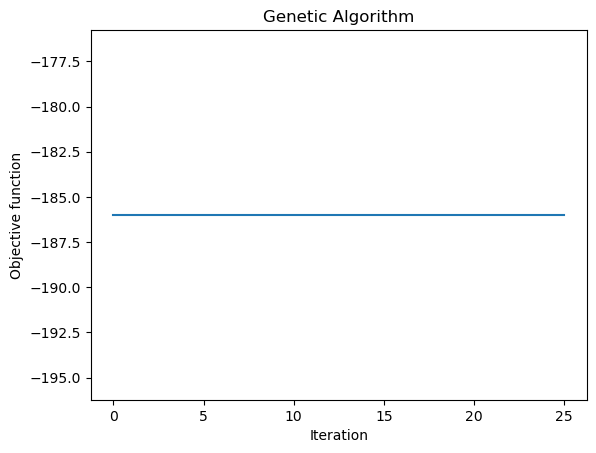

Genetic Algorithm Schedule: [1. 1. 1. 1. 1.]


In [2]:
from geneticalgorithm import geneticalgorithm as ga
import numpy as np
jobs = [("A", 2, 100), ("B", 1, 19), ("C", 2, 27), ("D", 1, 25), ("E", 3, 15)]
# Example: maximize sum of selected job profits under constraints
def fitness(X):
    return -sum(job[2] for job, chosen in zip(jobs, X) if chosen)  # negative for minimization

model = ga(function=fitness, dimension=len(jobs), variable_type='bool')
model.run()

best = model.best_variable
print("Genetic Algorithm Schedule:", best)
